In [32]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os, glob

def read_csv_folder(path):
    files = glob.glob(os.path.join(path,'*.csv'))
    files.sort()
    l=[]
    for f in files:
        l.append(pd.read_csv(f))
    return pd.concat(l,axis=0, ignore_index=True)

In [33]:
# Valeur à modifier pour gérer une autre interface
interface="ens160"

intf=read_csv_folder(f"../data/snmplabo/if-in-out/{interface}")
intf['datetime']= mdates.num2date(mdates.datestr2num(intf['datetime']))

intf.head(5)


,datetime,in,out
0,2023-05-04 12:55:02+00:00,3509622343,2101122729
1,2023-05-04 13:00:02+00:00,3513479264,2103153944
2,2023-05-04 13:05:02+00:00,3515384203,2103206800
3,2023-05-04 13:10:01+00:00,3517554282,2103413275
4,2023-05-04 13:15:02+00:00,3519700285,2103641959


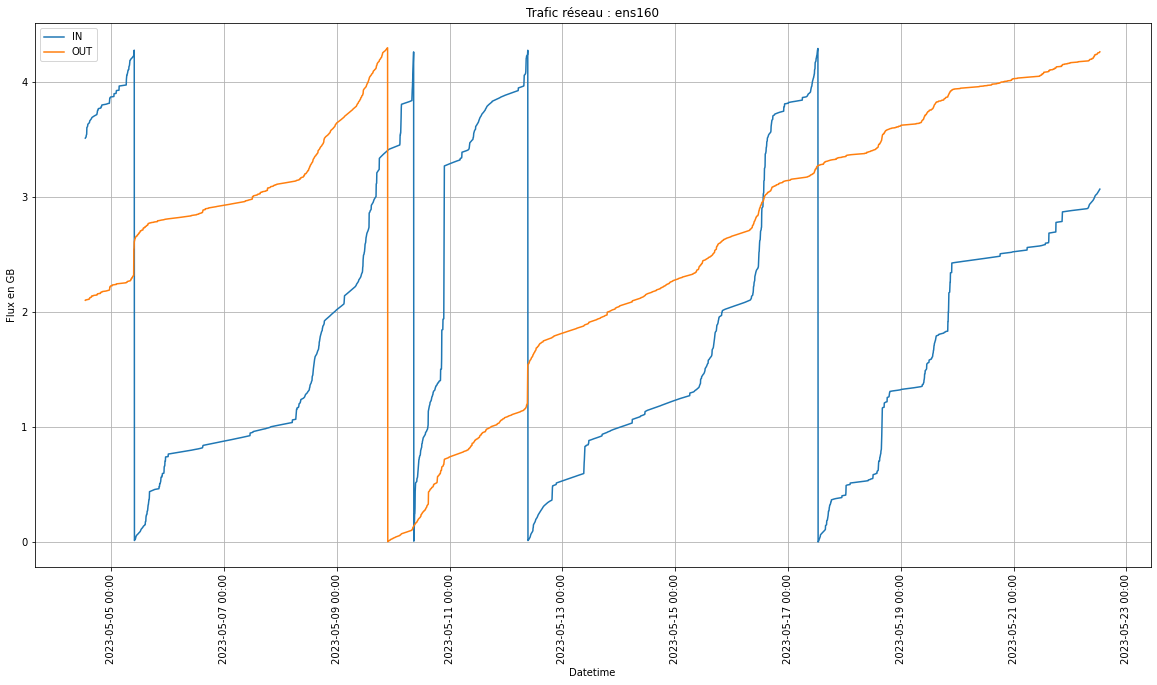

In [40]:
# Valeur à modifier pour zoomer en deux dates 
# Les données sont entre 2023-05-05 et 2023-05-23
date1 = mdates.num2date(mdates.datestr2num("2023-05-04")) 
date2 = mdates.num2date(mdates.datestr2num("2023-05-23"))

sintf=intf[(intf["datetime"] >= date1) & (intf["datetime"] <= date2)]
dates = sintf['datetime']
n=1e9
plt.figure(figsize=(20,10))
plt.plot(dates,sintf["in"]/n)
plt.plot(dates,sintf["out"]/n)
plt.legend(["IN","OUT"])
plt.title("Trafic réseau : ens160")
plt.xlabel("Datetime")
plt.ylabel("Flux en GB")
plt.xticks(rotation="vertical")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%F %H:%M'))
plt.grid(visible=True)
plt.show()

In [42]:
#extraction de serie 5m normale de la cumulative
intf["in_5min"]=intf["in"].diff().fillna(intf['in'])
intf["out_5min"]=intf["out"].diff().fillna(intf['out'])
intf_5min = intf[["datetime","in_5min","out_5min"]]
intf_5min.head(6)


,datetime,in_5min,out_5min
0,2023-05-04 12:55:02+00:00,3.509622e+09,2.101123e+09
1,2023-05-04 13:00:02+00:00,3.856921e+06,2.031215e+06
2,2023-05-04 13:05:02+00:00,1.904939e+06,5.285600e+04
3,2023-05-04 13:10:01+00:00,2.170079e+06,2.064750e+05
4,2023-05-04 13:15:02+00:00,2.146003e+06,2.286840e+05
5,2023-05-04 13:20:01+00:00,1.486276e+07,5.328100e+05


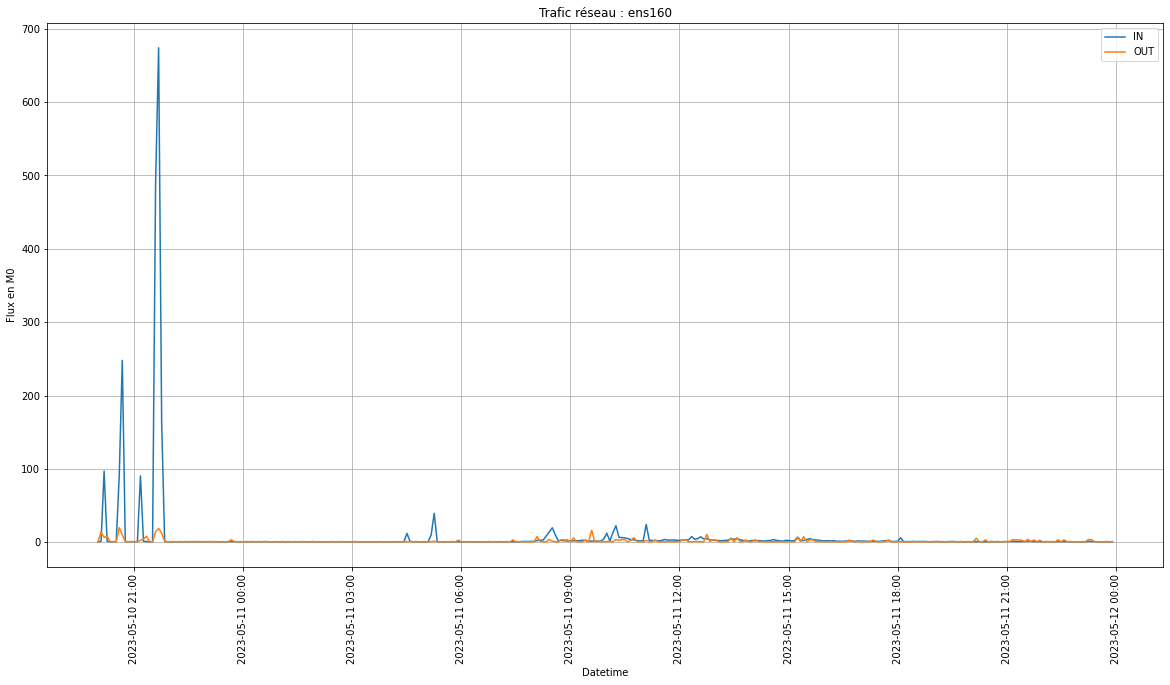

In [54]:
# Valeur à modifier pour zoomer en deux dates 
# Les données sont entre 2023-05-05 et 2023-05-23
date1 = mdates.num2date(mdates.datestr2num("2023-05-10 20")) 
date2 = mdates.num2date(mdates.datestr2num("2023-05-12"))

sintf_5min=intf_5min[(intf_5min["datetime"] >= date1) & (intf_5min["datetime"] <= date2)]
dates = sintf_5min['datetime']
n=1e6
plt.figure(figsize=(20,10))
plt.plot(dates,sintf_5min["in_5min"]/n)
plt.plot(dates,sintf_5min["out_5min"]/n)
plt.legend(["IN","OUT"])
plt.title("Trafic réseau : ens160")
plt.xlabel("Datetime")
plt.ylabel("Flux en M0")
plt.xticks(rotation="vertical")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%F %H:%M'))
plt.grid(visible=True)
plt.show()